# Импорт библиотек и чтетие данных
 

In [11]:
# получаю доступ к библиотеке Pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly 
import plotly.express as px


# в переменную передаю Dataframe
churn_data = pd.read_csv('data/churn.csv', sep=',')
display(churn_data.head())
churn_data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Задания 9.1 - 9.10



    RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
    CustomerId — идентификатор клиента
    Surname — фамилия клиента
    CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
    Geography — страна клиента (банк международный)
    Gender — пол клиента
    Age — возраст клиента

    Tenure — сколько лет клиент пользуется услугами банка
    Balance — баланс на счетах клиента в банке
    NumOfProducts — количество услуг банка, которые приобрёл клиент
    HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
    IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
    EstimatedSalary — предполагаемая заработная плата клиента
    Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)



## Задание 9.1

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

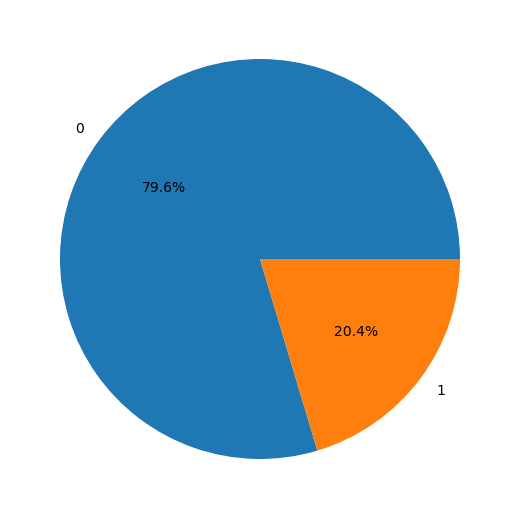

In [14]:
# создаю обьект типа .Series по которому будем строить круговую диаграмму
exited_s = churn_data['Exited'].value_counts()
# создаем холст в котором будет построенна диаграмма
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_s,
    labels=exited_s.index,
    autopct='%.1f%%',
    explode=[0, 0]
);


Из графика мы можем сделать вывод, что количесто ушедших клиентов 
примерно в четыре раза меньше чем количество лояльных.

## Задание 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

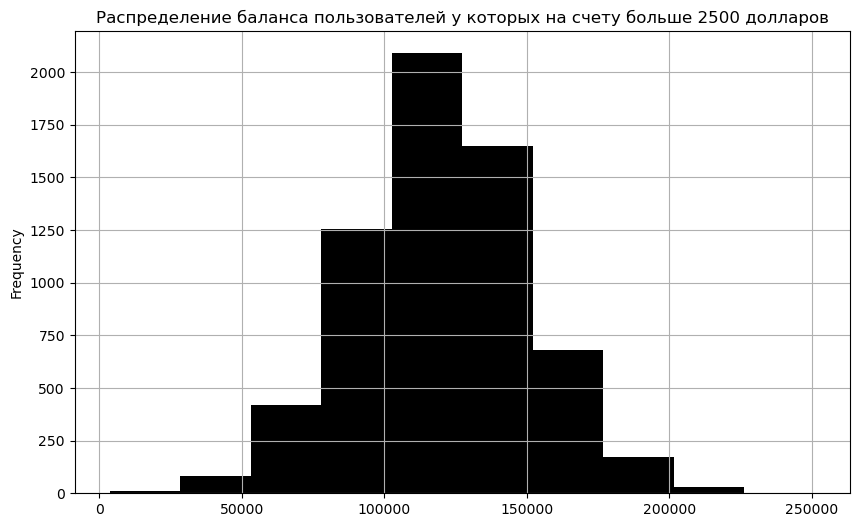

In [24]:
churn_data.head()
# выделяю обьект Series для построения гистограммы
churn_balance = churn_data[churn_data['Balance'] > 2500.00]
# строим гистограмму
churn_balance['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса пользователей \
у которых на счету больше 2500 долларов',
    grid=True,
    color='black',
    bins=10
);


Исходя из увиденного можно сделать вывод, что максимальное количество клиентов,
имеют на счету примерно от 100000 до 150000 долларов

## Задание 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


1     83807.86
3         0.00
4    125510.82
6         0.00
8    142051.07
Name: Balance, dtype: float64

0          0.00
2     159660.80
5     113755.78
7     115046.74
16    132602.88
Name: Balance, dtype: float64

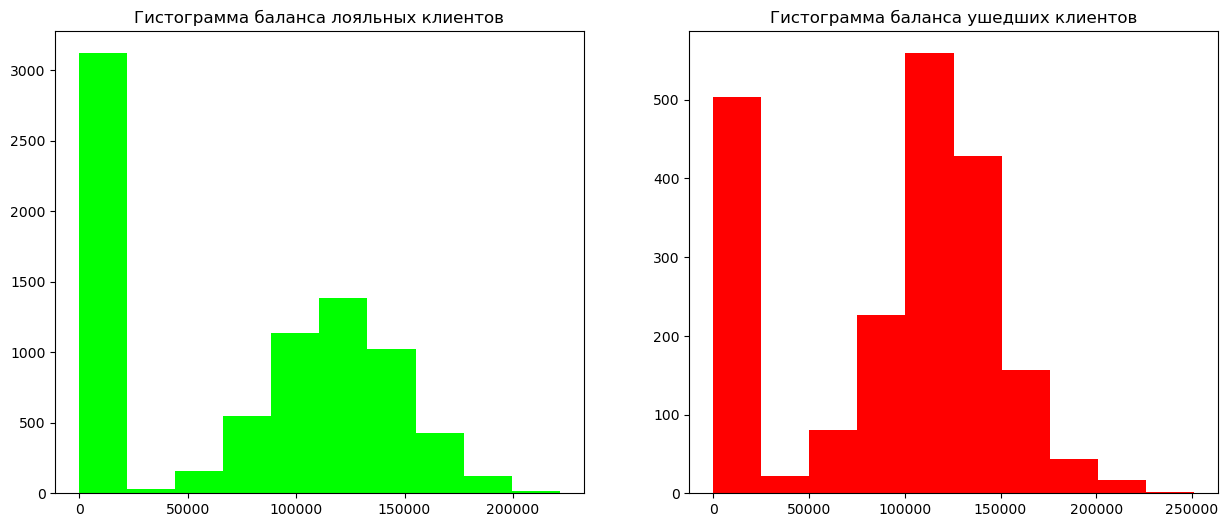

In [37]:
display(churn_data.head())
# смотрим на то как выглядит отфильтрованная таблица 
# в которой только лоялные клиенты
display(churn_data[churn_data['Exited'] == 0].head())
# отправляю отфильтрованную таблицу в переменную для визувлизации
churn_loyal = churn_data[churn_data['Exited'] == 0]
# смотрим на то как выглядит приготовленный для визуализации ряд
display(churn_loyal['Balance'].head())
# сохраяняем признак с балансом для лояльных клиентов в обьект Series
churn_loyal = churn_loyal['Balance']
# проделываем вышепредставленный код для ушедших клиентов
churn_exited = churn_data[churn_data['Exited'] == 1]
churn_exited = churn_exited['Balance']
# смотрим на ряд с информацией о балансе для ушедших клиентов
display(churn_exited.head())
# готовим холст для двух гистограмм на одном холсте
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
# задаем параметры для первой гистограммы
axes[0].hist(
    x=churn_loyal, label='Баланс лоялных клиентов',
    color='lime', bins=10
)
axes[0].set_title('Гистограмма баланса лояльных клиентов')
# строим гистограмму для ушедших клиентов
axes[1].hist(
    x=churn_exited, label='Баланс ушедших клиентов',
    color='red', bins=10
)
axes[1].set_title('Гистограмма баланса ушедших клиентов');

Исходя из увиденного можем сделать вывод что ушедших клиетов
с балансом 0 в 6 раз меньше чем лояльных клиентов.
Из гистограмм можно увидеть, что количество ушедших клиентов 
с большим балансом на много меньше чем количесвто лояльных клиетов.
Возможно ушедших клиентов может не устраивать сумма на балансе
и они видеть не целесообразно оставться в данном банке


# Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [3]:
# отображаю исходную таблицу для виизуального понимания
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


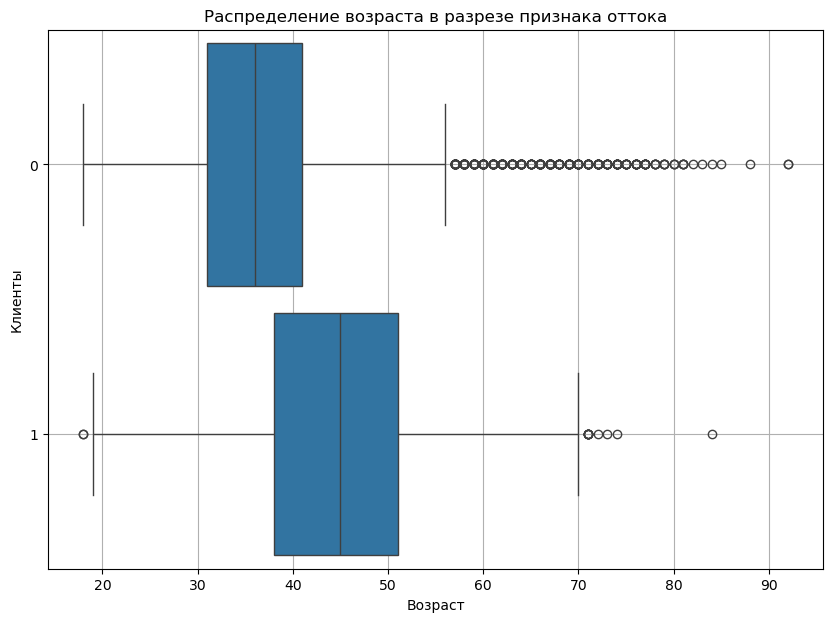

In [4]:
# отображаю холст для демонстрации графиков
fig = plt.figure(figsize=(10, 7))
# моделирую коробчатую диграмму
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
# задаю краткую информацию
boxplot.set_title('Распределение возраста в разрезе признака оттока');
# даю информацию на графике об оси абсцисс
boxplot.set_xlabel('Возраст');
# даю назавание оси ординат
boxplot.set_ylabel('Клиенты');
# отображаем сетку
boxplot.grid()

Исходя из увиденного можно сделать вывод, что необходимо обратить внимание на 
возрастную категорию от 40 до 50 лет. Также можно заметить, что в группе
лояльных клиентов больше всего выбросов.

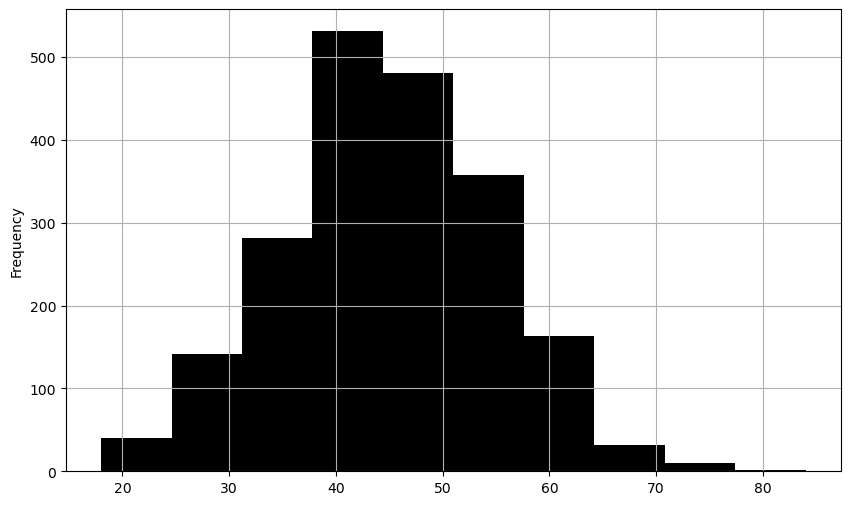

In [14]:
# строю гистограмму для лучшего понимания вышепредствленного графика
churn_data[churn_data['Exited'] == 1]['Age'].plot(
    kind='hist',
    figsize=(10, 6),
    bins=10,
    grid=True,
    color='black'
);

## Задание 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

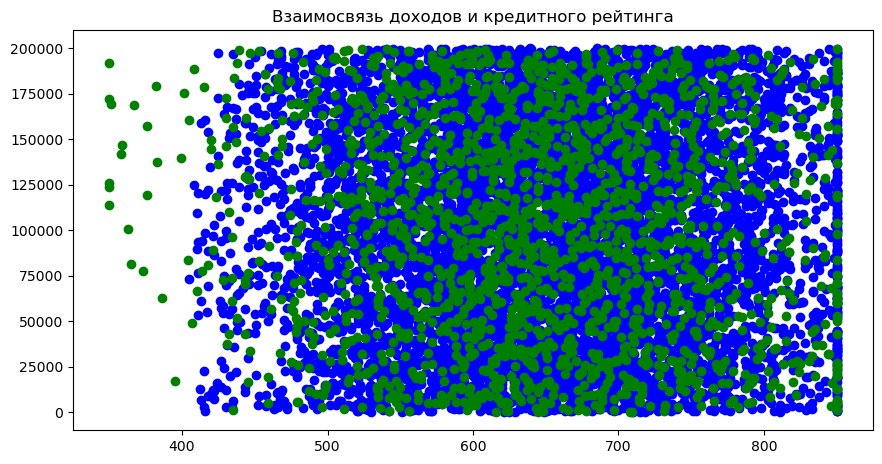

In [23]:
# для удобства построения графика создаю две переменные, 
# отфильтрованные по признаку оттока
churn_loyal = churn_data[churn_data['Exited'] == 0]
churn_exited = churn_data[churn_data['Exited'] == 1]
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
# сначала демонстрируем на холсте взаимосвязь для лояльных клиентов, 
# затем для ушедших
axes.scatter(
    x=churn_loyal['CreditScore'],
    y=churn_loyal['EstimatedSalary'],
    #s=100,
    #marker='o',
    c='blue',
)
axes.scatter(
    x=churn_exited['CreditScore'],
    y=churn_exited['EstimatedSalary'],
    #s=100,
    #marker='o',
    c='green',
)
axes.set_title('Взаимосвязь доходов и кредитного рейтинга');

Из графика можем отметить, что взаимосвязи не наблюдается 
ни для одной категории клиентов

## Задание 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [ ]:
# отображаем таблицу для визуального понимания
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Gender
Female    1139
Male       898
Name: count, dtype: int64

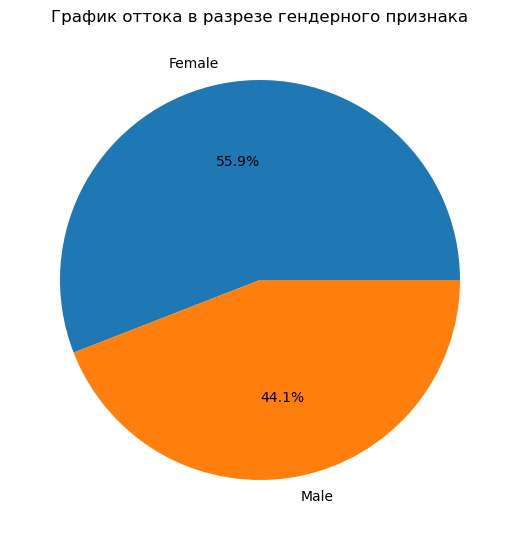

In [35]:
# фильтрую таблицу оставляю только ушедших клиентов
churn_exited = churn_data[churn_data['Exited'] == 1]
# оставляю только один ряд для построения диаграммы pie
churn_gender = churn_exited['Gender'].value_counts()
# проверяю ряд с содержанием информации о поле среди ушедших клиентов
display(churn_gender)
# моделирую кргуовую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_gender,
    labels=churn_gender.index,
    autopct='%.1f%%',
    explode=[0, 0]
)
# задаем имя графика
axes.set_title('График оттока в разрезе гендерного признака');

Из графика можем сделать вывод, что женщин из банка уходит больше чем мужчин

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

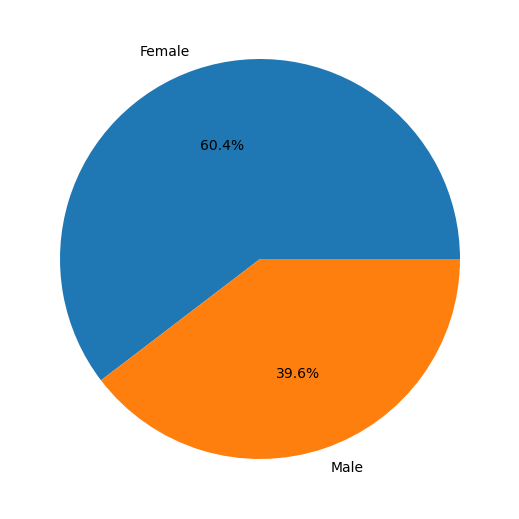

In [40]:
# строю альтернативный график
churn_group = churn_data.groupby(by=['Gender'])['Exited'].mean()
display(churn_group)
# при подсчете среднего арифметического комбинация 0 + 1 оставляет только 
# значение 1 т.е ушедшие клиенты, осюда понятно что график является достоверным
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_group,
    labels=churn_gender.index,
    autopct='%.1f%%',
    explode=[0, 0]
);

## Задание 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
# для наглядности отображаю таблицу
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
display(churn_data.info())
display(churn_data['NumOfProducts'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

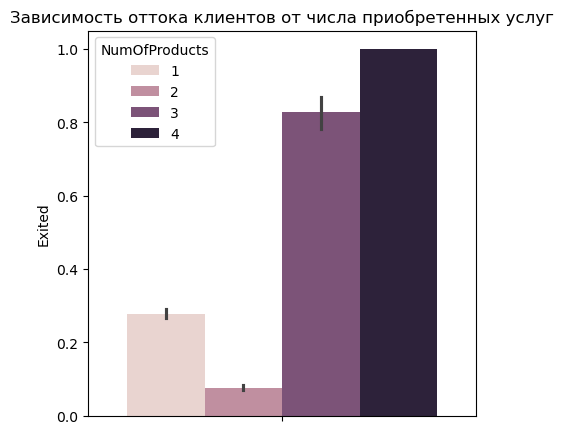

In [62]:
# создаю холст для таблицы
fig = plt.figure(figsize=(5, 5))
# моделируем многоуровнквую столбчатую диаграмму
barplot = sns.barplot(
    data=churn_data,
    # находим среднее значение в этом признаке
    y='Exited',
    # выбираем группировачный признак
    hue='NumOfProducts',
)
# задаем название графику
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг');

Из графка наблюдаем, что количество клиентов которые приобрели 2 услуги 
самый маленький и они осаются в банке. Наблюдаю болшой отток клиентов среди 
тех кто приобрел 3 или 4 услуги 

## Задание 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'График оттока неактивных клиентов')

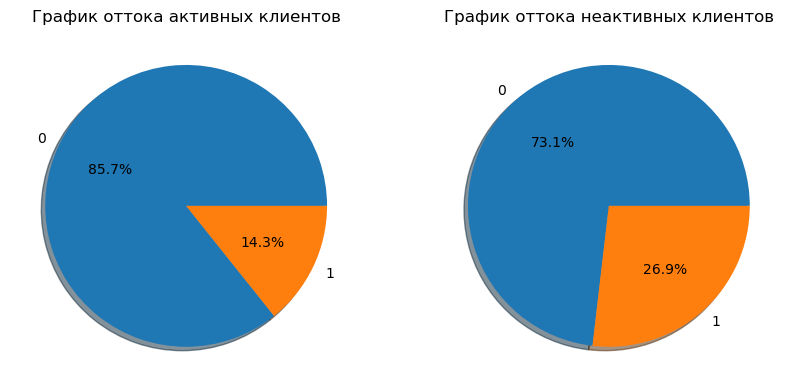

In [28]:
# отображаем основную таблицу, для понимания
display(churn_data.head())
# фильтрую таблицу и создаю два ряда для активных и неактивных клиентов
churn_yes = churn_data[churn_data['IsActiveMember'] == 1]
churn_yes = churn_yes['Exited'].value_counts()
churn_no = churn_data[churn_data['IsActiveMember'] == 0]
churn_no = churn_no['Exited'].value_counts()
# создаю хост для визуализции сразу двух диаграмм
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].pie(
    # вводим ряд
    churn_yes,
    # задаем название кускам пирога
    labels=churn_yes.index,
    # отображаем информацию в формате 100 процентов
    autopct='%.1f%%',
    # куски пирога оставляем на месте
    explode = [0, 0],
    shadow=True
)
# задаем название диагараммы
axes[0].set_title('График оттока активных клиентов')
axes[1].pie(
    # вводим ряд
    churn_no,
    # задаем название кускам пирога
    labels=churn_no.index,
    # отображаем информацию в формате 100 процентов
    autopct='%.1f%%',
    # куски пирога оставляем на месте
    explode = [0, 0],
    shadow=True
)
axes[1].set_title('График оттока неактивных клиентов')

Наблюдается меньшее количество ушедших клиентов среди активных клиентов.
Чтобы уменьшить отток клиентов необходимо предлагать 
неактивным клиентамм услуги банка 
т.к вероятность что они остануться в банке станет выше.

## Задание 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [81]:
# смотрим на то как выглядит ряд 
churn_percent = churn_data.groupby(by=['Geography'])['Exited'].mean()
# соединяем таблицы и создаем таблицу с новым признаком 
# в котором будет отображаться информация о доле ушедших клиентов
# для того чтобы описть тепловую картограмму
churn_merged = churn_data.merge(
    churn_percent,
    on='Geography',
    how='inner',
)
# описываю тепловую картограмму
fig = px.choropleth(
    churn_merged,
    locations='Geography',
    locationmode='country names',
    color='Exited_y',
    range_color=[0, 30e6],
    title='Доля ушедших клиентов на карте мира',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
# смотрим на соотношение на карте мира
fig.show()


Из графика можно сделать вывод, что в Германии самая большая доля 
шедших клиентов. 
Это может быть связвнно с тем, что в клиентов из Германии больше чем в остальных странах

## Задание 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [13]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


0         Fair
1         Fair
2         Poor
3         Good
4    Excellent
Name: CreditScore, dtype: object

9995         Good
9996         Poor
9997         Good
9998         Good
9999    Excellent
Name: CreditScore, dtype: object

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'Тепловая карта оттока клиентов')

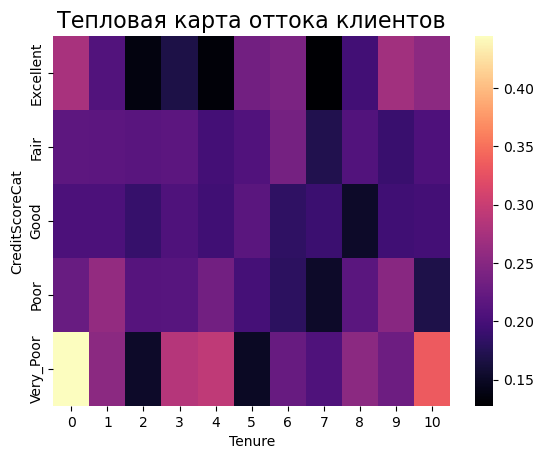

In [15]:
# для ипользлвания различных библиотек импортируем их
import pandas as pd
import seaborn as sns

# читаем в переменную таблицу в формате csv
churn_data = pd.read_csv('data/churn.csv', sep=',')
display(churn_data.head())

# пишем функцию на вход которой будет наравлена строка со значениями 
# из признака CredidScore
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
# добвляем в ряд прошедший через функцию признак, 
# чтобы в дальнейшем добавить ее в основную таблицу
credit_cat = churn_data['CreditScore'].apply(get_credit_score_cat)
display(credit_cat.head())
display(credit_cat.tail()) 
# добавляем в таблицу новый признак 
churn_data['CreditScoreCat'] = credit_cat
display(churn_data.head())

# инициализируем сводную таблицу для создания тепловой карты
churn_pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)

display(churn_pivot)

# строим теловую карту для того чтобы узнать зависимость оттока клиентов 
# с учетеом времени пользования услугами банка 
heatmap = sns.heatmap(data=churn_pivot, cmap='magma')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16)

Из графика можем сделать вывод, что наибольший отток клиентов которые пользуются услугами банка в течение 3-4 лет и у которых самый слабый кредитный рейтинг.На них стоит обратить внимение. Также стоит обраить внимание на клиентов которые пользуются услугами до года и имееют маленький кредитный ретинг.
Категория Fair имеет оптимальный показатель оттока. В категории с максимальным кредитным рейтингом стоит обратить внимаине на людей которые польщуются услугами банка до года и те кто работает с банком 9 или 10 лет. 